In [2]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
model = ChatGoogleGenerativeAI(model='gemini-2.5-flash',temperature=0.6)

In [5]:
# defining State

class BlogState(TypedDict):
    title:str
    outline:str
    content:str

In [ ]:
# function of create_outline node

def create_outline(state:BlogState)->BlogState:
    # fetch title
    title = state['title']
    # call llm and gen outline
    prompt = f'Generate an outline for a blog on the topic: {title}'
    
    outline = model.invoke(prompt).content
    
    # update the state
    
    state['outline'] = outline
    
    return state

In [7]:
# function of create blog node
def create_blog(state:BlogState)->BlogState:
    title = state['title']
    outline = state['outline']
    
    # call llm and gen a blog on the above outline
    prompt=  f'Write a detailed blog on the title  - {title}, using the following outline \n {outline}'
    
    content = model.invoke(prompt).content
    
    # update the State
    
    state['content'] = content
    
    
    return state

In [8]:
graph = StateGraph(BlogState)

# nodes of the graph
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)


# edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

# compile the graph

workflow = graph.compile()

In [9]:
initial_state = {'title':'Rise of AI in India'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Here\'s an outline for a blog post on "The Rise of AI in India," designed to be comprehensive, engaging, and easy to read.\n\n---\n\n## Blog Title Options:\n\n*   The AI Wave: India\'s Ascent in the Global AI Landscape\n*   Decoding India\'s AI Boom: Opportunities, Challenges, and the Road Ahead\n*   From Silicon Valley to Bangalore: Charting India\'s AI Revolution\n*   India\'s Intelligent Future: How AI is Reshaping the Nation\n\n---\n\n## Blog Outline: The Rise of AI in India\n\n**Target Audience:** Tech enthusiasts, business professionals, policymakers, students, and anyone interested in India\'s technological advancements.\n\n---\n\n### I. Introduction (Approx. 150 words)\n\n*   **Hook:** Start with a bold statement about AI\'s global impact and its transformative power.\n*   **Context:** Briefly introduce India\'s unique position – a tech-savvy nation with a massive digital footprint and a burgeoning economy.\n*   **Thesis Statement:**

In [13]:
print(final_state['outline'])

Here's an outline for a blog post on "The Rise of AI in India," designed to be comprehensive, engaging, and easy to read.

---

## Blog Title Options:

*   The AI Wave: India's Ascent in the Global AI Landscape
*   Decoding India's AI Boom: Opportunities, Challenges, and the Road Ahead
*   From Silicon Valley to Bangalore: Charting India's AI Revolution
*   India's Intelligent Future: How AI is Reshaping the Nation

---

## Blog Outline: The Rise of AI in India

**Target Audience:** Tech enthusiasts, business professionals, policymakers, students, and anyone interested in India's technological advancements.

---

### I. Introduction (Approx. 150 words)

*   **Hook:** Start with a bold statement about AI's global impact and its transformative power.
*   **Context:** Briefly introduce India's unique position – a tech-savvy nation with a massive digital footprint and a burgeoning economy.
*   **Thesis Statement:** State that India is rapidly emerging as a significant player in the global 

In [14]:
print(final_state['content'])

## India's Intelligent Future: How AI is Reshaping the Nation

Artificial Intelligence (AI) is not merely a technological advancement; it's a paradigm shift, poised to redefine industries, economies, and societies across the globe. In this seismic transformation, one nation is rapidly carving out a unique and influential position: India. With its colossal digital population, burgeoning tech talent, and an economy poised for exponential growth, India is rapidly emerging as a formidable force in the global AI landscape. Far from simply adopting foreign innovations, the subcontinent is developing indigenous AI solutions tailored to its distinct needs and diverse challenges. This blog post will delve into the unique drivers propelling India's AI boom, explore its widespread applications across key sectors, highlight its distinctive contributions, and examine the crucial challenges and the road ahead for this intelligent future.

### The Driving Forces Behind India's AI Boom

India's burgeo

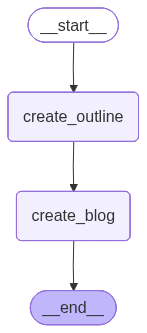

In [10]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())